In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [9]:
file_path = './male_players.csv'

df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,1,Kylian Mbappé,91,97,90,80,92,36,78,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
1,1,2,Rodri,91,66,80,86,84,87,85,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
2,2,4,Erling Haaland,91,88,92,70,81,45,88,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
3,3,5,Jude Bellingham,90,80,87,83,88,78,83,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
4,4,7,Vini Jr.,90,95,84,81,91,29,69,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


In [10]:
bins = [0, 69, 79, 89, 100]  
labels = ['<70', '70-79', '80-89', '90+']  

df['overall'] = pd.cut(df['OVR'], bins=bins, labels=labels, right=False)

cohort_counts = df['overall'].value_counts().sort_index()

cohort_counts

overall
<70      10521
70-79     5018
80-89      607
90+         15
Name: count, dtype: int64

In [11]:
league_cohort = df['League'].value_counts()

league_cohort

League
Sudamericana              826
MLS                       762
EFL Championship          683
EFL League One            615
Premier League            597
Libertadores              574
EFL League Two            562
Serie A Enilive           537
LALIGA EA SPORTS          529
Bundesliga 2              503
3. Liga                   496
LALIGA HYPERMOTION        496
Bundesliga                485
Ligue 1 McDonald's        464
CSL                       449
PKO BP Ekstraklasa        444
K League 1                435
Eredivisie                431
Serie BKT                 420
Liga Portugal             394
1A Pro League             392
ROSHN Saudi League        389
Primera División          385
Trendyol Süper Lig        381
Eliteserien               375
Allsvenskan               373
SUPERLIGA                 371
Ligue 2 BKT               361
Ö. Bundesliga             320
CSSL                      320
Scottish Prem             310
3F Superliga              299
ISL                       266
SSE

C:\Users\dirga\AppData\Local\Temp\ipykernel_23812\3493609469.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='League', columns='overall', aggfunc='size', fill_value=0)


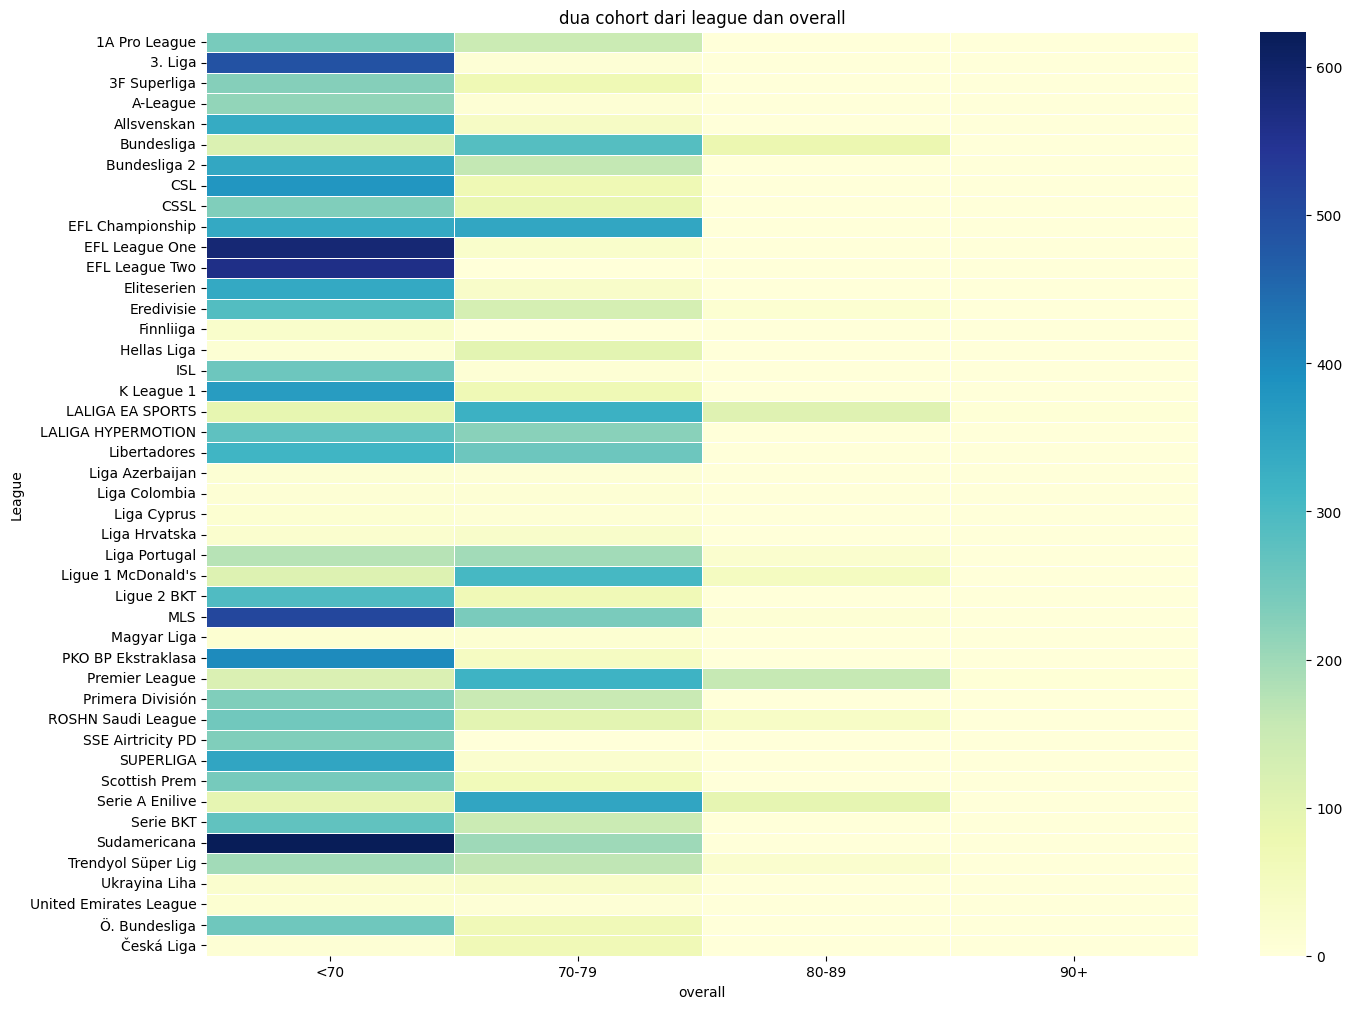

In [12]:
pivot_table = df.pivot_table(index='League', columns='overall', aggfunc='size', fill_value=0)

plt.figure(figsize=(16, 12))

sns.heatmap(pivot_table, cmap="YlGnBu", annot=False, linewidths=.5)

plt.title('dua cohort dari league dan overall')

plt.show()

In [13]:
t_stat, p_value = stats.ttest_ind(league_cohort, cohort_counts)

t_stat, p_value

(np.float64(-5.666532416275538), np.float64(8.573100006356775e-07))